In [1]:
# import the necessary libraries to read/manipulate the data
import pandas as pd
import numpy as np
#The file could be containing Arabic, therefore use the encoding that will allow the arabic
df = pd.read_csv("data/survey_data.csv",encoding='windows-1256')

In [2]:
#checking the data types
df.dtypes

Student Code          object
Grade                 object
Gender                object
Question              object
School Code            int64
Survey Score         float64
Survey Time Spent      int64
Exam Score           float64
dtype: object

In [3]:
#Assuming data will come with the same column names, optimize the column names 
df = df.rename(index=str, columns={"Student Code": "studentCode",
                                   "Grade":"grade",
                                   "Gender":"gender",
                                   "Question":"question",
                                   "School Code":"schoolCode",
                                   "Survey Score":"surveyScore",
                                   "Survey Time Spent":"surveyTimeSpent",
                                   "Exam Score":"examScore"})

In [4]:
#missing value checks
print(df.isnull().sum()) #There are 120 missing exam scores

studentCode          0
grade                0
gender               0
question             0
schoolCode           0
surveyScore          0
surveyTimeSpent      0
examScore          120
dtype: int64


In [5]:
# making the Question column to lower case for efficient text parsing 
df['question'] = df['question'].str.lower()

In [6]:
#Let's see what type of students we are missing the exam scores 
missingExamScoreDf = df.loc[df.examScore.isnull() == True]
print(missingExamScoreDf)

      studentCode    grade gender  \
8495      123-936  Grade 6  Girls   
17704    123-1458  Grade 6  Girls   
17705    123-1458  Grade 6  Girls   
17709    123-1458  Grade 6  Girls   
17710    123-1458  Grade 6  Girls   
18144    123-1458  Grade 6  Girls   
18149    123-1458  Grade 6  Girls   
18493    123-1458  Grade 6  Girls   
18495    123-1458  Grade 6  Girls   
18496    123-1458  Grade 6  Girls   
18497    123-1458  Grade 6  Girls   
18584    123-1458  Grade 6  Girls   
18586    123-1458  Grade 6  Girls   
21487     123-936  Grade 6  Girls   
21608     123-936  Grade 6  Girls   
21609     123-936  Grade 6  Girls   
21610     123-936  Grade 6  Girls   
21611     123-936  Grade 6  Girls   
22005     123-936  Grade 6  Girls   
22006     123-936  Grade 6  Girls   
22007     123-936  Grade 6  Girls   
22008     123-936  Grade 6  Girls   
22009     123-936  Grade 6  Girls   
22010     123-936  Grade 6  Girls   
22196     123-936  Grade 6  Girls   
22197     123-936  Grade 6  Girls   
2

In [7]:
print(missingExamScoreDf.nunique())
# There are 2 types of students where there are missing exam scores , 
# only 1 grade;6 ;where there are missing exam scores 
# Two types of school codes; 8000,9000;where there are missing exam scores 
# Only 1 gender; Girls;where there are missing exam scores 
# From 2 schools ;where there are missing exam scores 
# Majority of the test scores are above 50%; 88%
# Exactly half of the students spent 27, and the other half spent 11

studentCode         2
grade               1
gender              1
question           60
schoolCode          2
surveyScore         8
surveyTimeSpent     2
examScore           0
dtype: int64


# 1st question: What is the general correlation between Survey Score and Exam Score?


In [8]:
#Drop the rows with missing exam scores
nanDropped = df.dropna()

In [9]:
# Let's calculate the correlation with the p-value
from scipy import stats
print(stats.pearsonr(nanDropped['surveyScore'],nanDropped['examScore']))
print("assumping the assumptions for the pearson's coefficient assumption hold true,")
print("The p-value is less than 0.05, correlation is statistically significant")
print("Interpretation: Survey score and the exam score have postivie, weak, linear relationship")

(0.12463255665768065, 1.7428944273386622e-158)
assumping the assumptions for the pearson's coefficient assumption hold true,
The p-value is less than 0.05, correlation is statistically significant
Interpretation: Survey score and the exam score have postivie, weak, linear relationship


# 2nd question: Is there any correlation between the students’ feedback on Parental Involvement questions and their Exam score? What about Teacher facilitation and ICT Skills  questions? (You need to identify the relevant questions of these categories)

In [10]:
# Tag the relevant rows by adding columns for the parental involvement, teacher facilitation, ict skills
df['parent_Flag'] = np.where(df['question'].str.contains("parent", case=False), 1, 0)
df['teacher_Flag'] = np.where(df['question'].str.contains("teacher", case=False), 1, 0)
df['ict_Flag']=np.where(
                    (df['question'].str.contains("technology"))
                     | (df["question"].str.contains("digital"))
                     | (df["question"].str.contains("web"))
                     | (df["question"].str.contains("computer"))
                     | (df["question"].str.contains("laptop"))
                     | (df["question"].str.contains("keyboard"))
                     | (df["question"].str.contains("online"))
                    ,1,0)

In [13]:
#Drop the missing exam scores from the df again
nanDropped = df.dropna()

In [14]:
print("correlation and the p-value for the feedbacks wrt parental involvement & exam score is",stats.pearsonr(nanDropped['parent_Flag'],nanDropped['examScore']))
print("correlation and the p-value for the feedbacks wrt teacher facilitation & exam score is",stats.pearsonr(nanDropped['teacher_Flag'],nanDropped['examScore']))
print("correlation and the p-value for the feedbacks wrt ict skills & exam score is",stats.pearsonr(nanDropped['ict_Flag'],nanDropped['examScore']))
print("The correlations are not only weak but does not hold any statistical significance")
print("caveat: Using pearson's correlation coefficient to measure the associations may be biased or incorrect")


correlation and the p-value for the feedbacks wrt parental involvement & exam score is (0.0, 1.0)
correlation and the p-value for the feedbacks wrt teacher facilitation & exam score is (-4.74305801181884e-18, 1.0)
correlation and the p-value for the feedbacks wrt ict skills & exam score is (-2.8140367721166272e-18, 1.0)
The correlations are not only weak but does not hold any statistical significance
caveat: Using pearson's correlation coefficient to measure the associations may be biased or incorrect


## Let's visualize the relationships between each feedback categories with the exam scores

In [15]:
# import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

interpretation: Looking at the shape of the boxplot, it doesn't look like the parental involvement does not differentiate the exam score


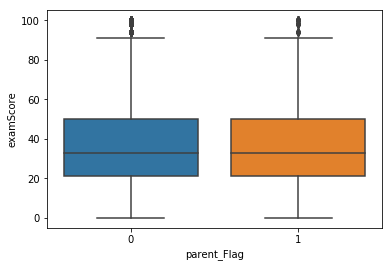

In [16]:
#parental involvement & exam score
sns.boxplot(x='parent_Flag', y='examScore', data=df) 
print("interpretation: Looking at the shape of the boxplot, it doesn't look like the parental involvement does not differentiate the exam score")


interpretation: Looking at the shape of the boxplot, it doesn't look like the teacher facilitation does not differentiate the exam score


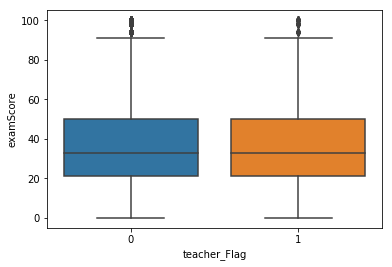

In [17]:
#teacher facilitation $ exam score
sns.boxplot(x='teacher_Flag', y='examScore', data=df) 
print("interpretation: Looking at the shape of the boxplot, it doesn't look like the teacher facilitation does not differentiate the exam score")


interpretation: Looking at the shape of the boxplot, it doesn't look like the ict skills does not differentiate the exam score


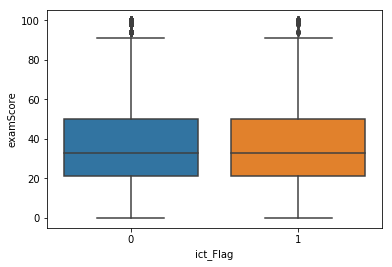

In [18]:
#ict skills & exam score
sns.boxplot(x='ict_Flag', y='examScore', data=df) 
print("interpretation: Looking at the shape of the boxplot, it doesn't look like the ict skills does not differentiate the exam score")


## How about we study if those feedback categories affect the survey score?

Interpretation: ict skills related questions don't seem to be affecting the survey score


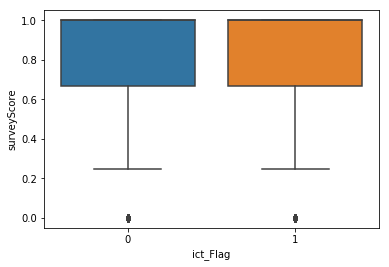

In [19]:
sns.boxplot(x='ict_Flag', y='surveyScore', data=df)
print("Interpretation: ict skills related questions don't seem to be affecting the survey score")

It appears that the students with non-parental related feedback scored the survey more positively


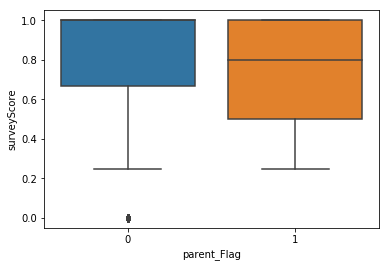

In [20]:
sns.boxplot(x='parent_Flag', y='surveyScore', data=df)
print("It appears that the students with non-parental related feedback scored the survey more positively")

It appears that the students with non-teacher related feedback scored the survey more positively


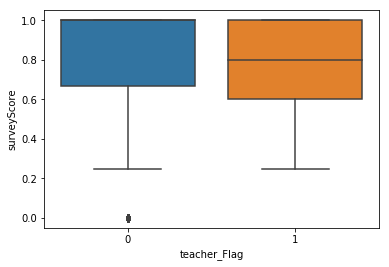

In [21]:
sns.boxplot(x='teacher_Flag', y='surveyScore', data=df)
print("It appears that the students with non-teacher related feedback scored the survey more positively")

# 3rd question: What is the role of Gender on feedback Scores for different questions?

In [22]:
# Create dummy variable; convert Boys to 1 and Girls to 0 
df['genderDummy'] = np.where(df['gender'].str.contains("Boys", case=False), 1, 0)


In [24]:
stats.pearsonr(df['surveyScore'],df['genderDummy'])
print("Negative correlation with statistically significant p-value. But again, pearson's correlation coefficient might not be the right test to measure the relationship")
print("pearson's correlation coefficient expects continuous variables. Though I transformed the gender to numerical, it doesn't create the meaningful scale between the values.")



Negative correlation with statistically significant p-value. But again, pearson's correlation coefficient might not be the right test to measure the relationship
pearson's correlation coefficient expects continuous variables. Though I transformed the gender to numerical, it doesn't create the meaningful scale between the values.


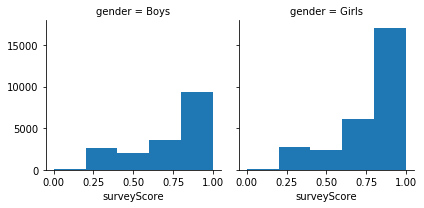

In [25]:
#Let's visualize if boys and girls score the survey differently 
genderSurvey = sns.FacetGrid(data=df, col='gender')
genderSurvey.map(plt.hist, 'surveyScore', bins=5)

Looking at the histograms above and this boxplot, girls tend to be score the survey higher than boys do


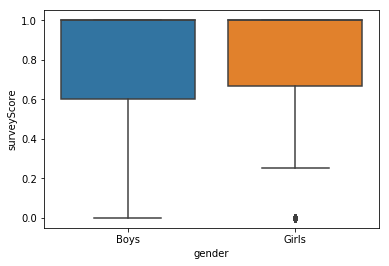

In [26]:
sns.boxplot(x='gender', y='surveyScore', data=df)
print("Looking at the histograms above and this boxplot, girls tend to be score the survey higher than boys do")

# Additional observations

## How about the performance and the gender?

interpretation: In this sample, girls tend to perform better than boys


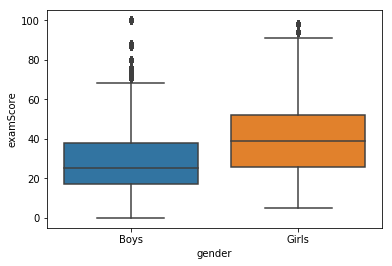

In [27]:
sns.boxplot(x='gender', y='examScore', data=df)
print("interpretation: In this sample, girls tend to perform better than boys")

interpretation: It's interesting to see that non-parental questions tend to have better survey score 


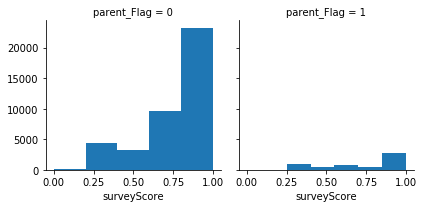

In [28]:
# parental involvement & survey score
parentSurvey = sns.FacetGrid(data=df, col='parent_Flag')
parentSurvey.map(plt.hist, 'surveyScore', bins=5)
print("interpretation: It's interesting to see that non-parental questions tend to have better survey score ")

In [29]:
# Checking if there is any linear relationship between the survey time spent and the survey score
print(stats.pearsonr(df['surveyTimeSpent'],df['surveyScore']))
print("interpretation: Negative, weak linear relationship between the survey time spent and survey score")

(-0.03395110556438538, 3.1010731913661646e-13)
interpretation: Negative, weak linear relationship between the survey time spent and survey score
